# Figures of GEMM Throughputs

In [21]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
#    'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [22]:
def read_logfile(logfile_name):
    throughputs = []
    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()
            match = re.match(r'Throughput \(in TFLOP/s\) for (\d+)x(\d+)x(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k = int(match.group(1)), int(match.group(2)), int(match.group(3))
                throughput = float(match.group(4))
                throughputs.append({'m': m, 'n': n, 'k': k,
                                    'throughput': throughput})
    return throughputs

In [23]:
def plot_throughputs(all_throughputs,all_labels, xaxis_variable,
                     xlabel, ylabel, output_filename=None, markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    for throughputs, label in zip(all_throughputs,all_labels):
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs]
        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=label, marker='o', markevery=markevery)
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend(frameon=False)    
    sns.despine()
    if output_filename is not None:
        plt.savefig(output_filename, bbox_inches='tight')
    plt.show()

# Throughputs of GEMMs with various m sizes

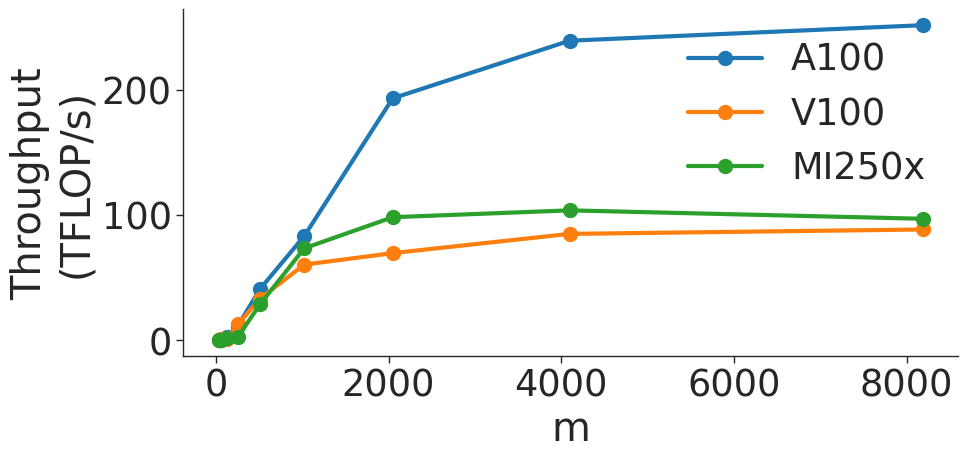

In [24]:
prefix="../results/gemm_data/mm/m_sweep/"
plot_throughputs([read_logfile(f"{prefix}/a100.out"),
                 read_logfile(f"{prefix}/v100.out"),
                 read_logfile(f"{prefix}/mi250x.out")],
                 ["A100","V100","MI250x"],
                 'm', 'm', 'Throughput\n(TFLOP/s)')

# Throughputs of GEMMs with various k sizes

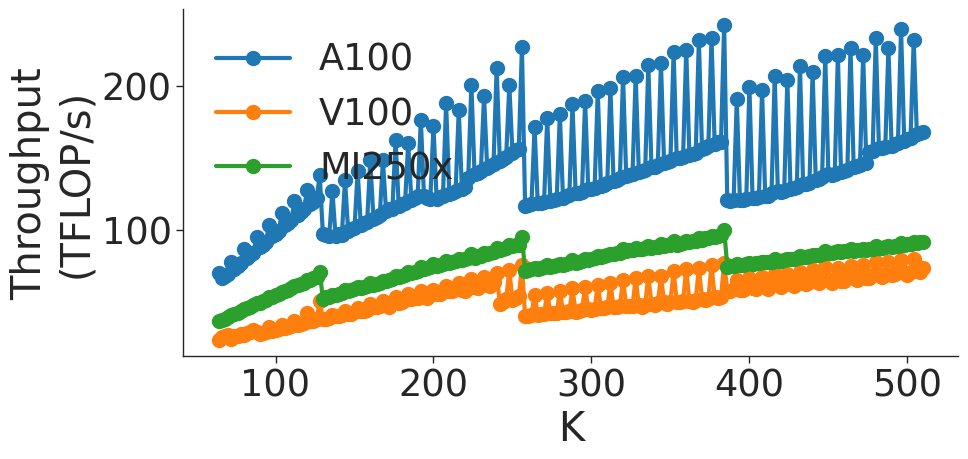

In [25]:
prefix="../results/gemm_data/mm/ksweep_low"
plot_throughputs([read_logfile(f"{prefix}/a100.out"),
                 read_logfile(f"{prefix}/v100.out"),
                 read_logfile(f"{prefix}/mi250x.out")],
                 ["A100","V100","MI250x"],
                 'k', 'K', 'Throughput\n(TFLOP/s)')

# Throughputs of GEMMs with larger k sizes

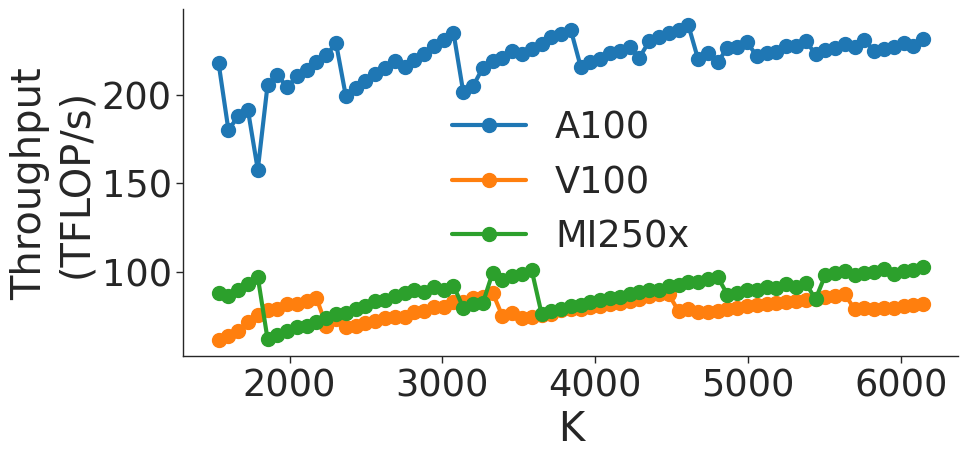

In [26]:
prefix="../results/gemm_data/mm/ksweep_high/"
plot_throughputs([read_logfile(f"{prefix}/a100.out"),
                 read_logfile(f"{prefix}/v100.out"),
                 read_logfile(f"{prefix}/mi250x.out")],
                 ["A100","V100","MI250x"],
                 'k', 'K', 'Throughput\n(TFLOP/s)')